# Introduction to Pandas

In [3]:
import pandas as pd
import matplotlib as plt

In [4]:
series = pd.Series(["BMW", "Toyota", "Honda"])
series

0       BMW
1    Toyota
2     Honda
dtype: object

In [5]:
colors =  pd.Series(['blue', 'red', 'white'])
colors

0     blue
1      red
2    white
dtype: object

In [6]:
car_data = pd.DataFrame({'Car Make': series, 'Color': colors})
car_data

,Car Make,Color
0,BMW,blue
1,Toyota,red
2,Honda,white


In [7]:
car_sales = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv')

In [8]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


# Describing data

In [9]:
car_sales.dtypes   #attributes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [10]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [11]:
car_columns = car_sales.columns

In [12]:
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [13]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [14]:
car_sales.describe()    #function

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [15]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Make             10 non-null object
Colour           10 non-null object
Odometer (KM)    10 non-null int64
Doors            10 non-null int64
Price            10 non-null object
dtypes: int64(2), object(3)
memory usage: 480.0+ bytes


In [16]:
car_sales.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [17]:
car_sales.sum()

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

In [18]:
car_sales['Doors'].sum()

40

In [19]:
len(car_sales)

10

In [20]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [21]:
car_sales.tail(2)

,Make,Colour,Odometer (KM),Doors,Price
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### .loc[] and .iloc[] 
* .ilo[] refers to position
* .loc[] refers to index

In [22]:
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [23]:
car_sales.loc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [24]:
car_sales['Make']

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [25]:
car_sales.Make   # not going to work if the column name has a space in it

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [26]:
car_sales['Make'].loc[:3]

0    Toyota
1     Honda
2    Toyota
3       BMW
Name: Make, dtype: object

In [27]:
car_sales[car_sales['Make'] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [28]:
car_sales[car_sales['Odometer (KM)'] > 10000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [29]:
pd.crosstab(car_sales['Make'], car_sales['Doors'])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [30]:
car_sales.groupby(car_sales['Make']).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


In [31]:
car_sales['Odometer (KM)'].plot()

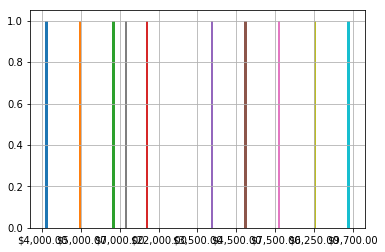

In [32]:
car_sales['Price'].hist()

In [33]:
car_sales['Price_2'] = car_sales['Price'].str.replace('[\$\,\.]', '').astype(int)/100

In [34]:
car_sales['Price_2'] 

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7     7000.0
8     6250.0
9     9700.0
Name: Price_2, dtype: float64

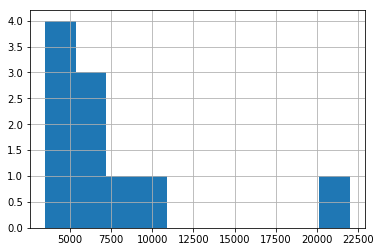

In [35]:
car_sales['Price_2'].hist()

# Manupulatin Data

In [36]:
car_sales['Make'] = car_sales['Make'].str.lower()

In [37]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Price_2
0,toyota,White,150043,4,"$4,000.00",4000.0
1,honda,Red,87899,4,"$5,000.00",5000.0
2,toyota,Blue,32549,3,"$7,000.00",7000.0
3,bmw,Black,11179,5,"$22,000.00",22000.0
4,nissan,White,213095,4,"$3,500.00",3500.0
5,toyota,Green,99213,4,"$4,500.00",4500.0
6,honda,Blue,45698,4,"$7,500.00",7500.0
7,honda,Blue,54738,4,"$7,000.00",7000.0
8,toyota,White,60000,4,"$6,250.00",6250.0
9,nissan,White,31600,4,"$9,700.00",9700.0


### Filling NaN with something else

In [38]:
car_sales['Odometer (KM)'] = car_sales['Odometer (KM)'].fillna(car_sales['Odometer (KM)'].mean()) 

In [39]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Price_2
0,toyota,White,150043,4,"$4,000.00",4000.0
1,honda,Red,87899,4,"$5,000.00",5000.0
2,toyota,Blue,32549,3,"$7,000.00",7000.0
3,bmw,Black,11179,5,"$22,000.00",22000.0
4,nissan,White,213095,4,"$3,500.00",3500.0
5,toyota,Green,99213,4,"$4,500.00",4500.0
6,honda,Blue,45698,4,"$7,500.00",7500.0
7,honda,Blue,54738,4,"$7,000.00",7000.0
8,toyota,White,60000,4,"$6,250.00",6250.0
9,nissan,White,31600,4,"$9,700.00",9700.0


In [40]:
car_sales =  car_sales.dropna()  # getting rid of NaN

### Adding a coulumn

#### Column from  Series

In [44]:
car_seats = pd.Series([5,5,5,5,5,5,5])

car_sales['car_seats'] = car_seats
car_sales['car_seats'].fillna(car_sales['car_seats'].mean(), inplace = True)   # filling NaN
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Price_2,car_seats
0,toyota,White,150043,4,"$4,000.00",4000.0,5.0
1,honda,Red,87899,4,"$5,000.00",5000.0,5.0
2,toyota,Blue,32549,3,"$7,000.00",7000.0,5.0
3,bmw,Black,11179,5,"$22,000.00",22000.0,5.0
4,nissan,White,213095,4,"$3,500.00",3500.0,5.0
5,toyota,Green,99213,4,"$4,500.00",4500.0,5.0
6,honda,Blue,45698,4,"$7,500.00",7500.0,5.0
7,honda,Blue,54738,4,"$7,000.00",7000.0,5.0
8,toyota,White,60000,4,"$6,250.00",6250.0,5.0
9,nissan,White,31600,4,"$9,700.00",9700.0,5.0


#### Column from python list

In [46]:
fuel_economy = [2.1, 5.2, 6.1, 6.4, 3.5, 2.1, 5.2, 6.1, 6.4, 3.5]  # Imp note: list requires exact number of items as the index
car_sales["Fuel per 100 km"] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Price_2,car_seats,Fuel per 100 km
0,toyota,White,150043,4,"$4,000.00",4000.0,5.0,2.1
1,honda,Red,87899,4,"$5,000.00",5000.0,5.0,5.2
2,toyota,Blue,32549,3,"$7,000.00",7000.0,5.0,6.1
3,bmw,Black,11179,5,"$22,000.00",22000.0,5.0,6.4
4,nissan,White,213095,4,"$3,500.00",3500.0,5.0,3.5
5,toyota,Green,99213,4,"$4,500.00",4500.0,5.0,2.1
6,honda,Blue,45698,4,"$7,500.00",7500.0,5.0,5.2
7,honda,Blue,54738,4,"$7,000.00",7000.0,5.0,6.1
8,toyota,White,60000,4,"$6,250.00",6250.0,5.0,6.4
9,nissan,White,31600,4,"$9,700.00",9700.0,5.0,3.5


#### Column from a number

In [48]:
car_sales["Number of Wheels"] = 4
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Price_2,car_seats,Fuel per 100 km,Total Fuel Used,Number of Wheels
0,toyota,White,150043,4,"$4,000.00",4000.0,5.0,2.1,71449.047619,4
1,honda,Red,87899,4,"$5,000.00",5000.0,5.0,5.2,16903.653846,4
2,toyota,Blue,32549,3,"$7,000.00",7000.0,5.0,6.1,5335.901639,4
3,bmw,Black,11179,5,"$22,000.00",22000.0,5.0,6.4,1746.718750,4
4,nissan,White,213095,4,"$3,500.00",3500.0,5.0,3.5,60884.285714,4
5,toyota,Green,99213,4,"$4,500.00",4500.0,5.0,2.1,47244.285714,4
6,honda,Blue,45698,4,"$7,500.00",7500.0,5.0,5.2,8788.076923,4
7,honda,Blue,54738,4,"$7,000.00",7000.0,5.0,6.1,8973.442623,4
8,toyota,White,60000,4,"$6,250.00",6250.0,5.0,6.4,9375.000000,4
9,nissan,White,31600,4,"$9,700.00",9700.0,5.0,3.5,9028.571429,4


### Performing operations on columns

In [49]:
car_sales['Total Fuel Used'] = car_sales['Odometer (KM)']/car_sales["Fuel per 100 km"]
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Price_2,car_seats,Fuel per 100 km,Total Fuel Used,Number of Wheels
0,toyota,White,150043,4,"$4,000.00",4000.0,5.0,2.1,71449.047619,4
1,honda,Red,87899,4,"$5,000.00",5000.0,5.0,5.2,16903.653846,4
2,toyota,Blue,32549,3,"$7,000.00",7000.0,5.0,6.1,5335.901639,4
3,bmw,Black,11179,5,"$22,000.00",22000.0,5.0,6.4,1746.718750,4
4,nissan,White,213095,4,"$3,500.00",3500.0,5.0,3.5,60884.285714,4
5,toyota,Green,99213,4,"$4,500.00",4500.0,5.0,2.1,47244.285714,4
6,honda,Blue,45698,4,"$7,500.00",7500.0,5.0,5.2,8788.076923,4
7,honda,Blue,54738,4,"$7,000.00",7000.0,5.0,6.1,8973.442623,4
8,toyota,White,60000,4,"$6,250.00",6250.0,5.0,6.4,9375.000000,4
9,nissan,White,31600,4,"$9,700.00",9700.0,5.0,3.5,9028.571429,4
